In [1]:
%pylab inline
lecture = 11

Populating the interactive namespace from numpy and matplotlib


#Lecture 11: Numerical Methods for Ordinary Differential Equations

## Topics

* Introduction
    * Picard's Theorem
    
    
* Examples in Finance
    * Black-Scholes Equation
    * Affine Term-structure model
    
    





* Numerical Methods
    * Finite Difference Methods
    * The Euler's Methods
    * Consistency, Stability and Convergence
    * The Backward Euler's Methods
    * The Crank-Nicholson Method
    * The Runge-Kutta Method
    
    
* Numerical Examples



# Introduction


* The initial value problem (IVP) of a general **first** order ordinary differential equation (ODE) 

$$
y' = f(t,y), \;\; y(t_0) = y_0
$$

* The integral formulation

$$
y(t) = y_0 + \int_{t_0}^t f(s,y(s)) \; ds
$$

* If $f(t,y)$ is independent of $y$, solving the ODE is simply an integration. In general, the integral equation is not any easier to solve.


* If $f(t,y)$ is independent of $t$, the ODE is said to be **autonomous**






* If $y$ and $f$ are vectors, this becomes a system of first order ODEs

$$
\renewcommand{bs}{\boldsymbol}
\renewcommand{by}{\boldsymbol{y}}
\renewcommand{bf}{\boldsymbol{f}}
\by' = \bf(t, \by), \;\; \by(t_0) = \by_0
$$

* General $n^{th}$ order ODE

$$
y^{(n)}(t) = f(t,y(t),y'(t), \cdots, y^{(n-1)}(t))
$$

* Can be converted into a system of first order ODEs

$$
\bs{z}' = \bs{g}(t, \bs{z})
$$

$\hspace{0.3in}$ where 

$$
\begin{matrix}
\bs{z} =  \left[
\begin{matrix}
y(t) \\
y'(t) \\
\vdots \\
y^{(n-1)}(t) 
\end{matrix}
\right], \;\; \mbox{and} \;\;
\end{matrix}
\begin{matrix}
\bs{g}(t, \bs{z}) =  \left[
\begin{matrix}
y'(t) \\
y''(t) \\
\vdots \\
y^{(n-1)}(t) \\
f(t,y(t),y'(t), \cdots, y^{(n-1)}(t))
\end{matrix}
\right]
\end{matrix}
$$



## Picard's Theorem

* Interesting things one want to know about the IVP of the general first order systems of ODE:

    * 1) Is there a solution?

    * 2) Is the solution unique?

    * 3) Is the solution sensitive to the data?

    * 4) How to solve for the solution?
    

* **Picard's theorem**:
If $f(t,y)$ is Lipschitz continuous in $y$ in a neighborhood of $(t_0, y(t_0))$, then the IVP of the ODE has a unique solution in the neighborhood.


# Examples in Finance

### **Black-Scholes** equation

$$
C_t = \frac{1}{2}\sigma^2S^2C_{SS} + rSC_S - rC
$$

Define the Laplace transform of option price function $C(t,S)$ as

$$
\renewcommand{hC}{\hat{C}}
\hC(z,\cdot) := \mathcal{L}[C](z) = \int_{0}^{\infty}C(t,\cdot)e^{-zt} \; dt
$$

Taking the Laplace trasform of the Black-Scholes equation,

$$
z\hC = \frac{1}{2}\sigma^2S^2 \hC_{SS} + rS \hC_S - r \hC + C_0
$$

Here $C_0$ is the time reversed payoff condition (*).

So one way to solve Black-Scholes is to solve an ODE and then invert the Laplace Transform.




### Affine Term Structure model

Assume the short rate is affine under the risk-neutral measure

$$
dr_t = \kappa(\theta-r_t)dt + \sqrt{\sigma_1 +\sigma_2 r_t}\;dW_t
$$

Then bond prices are solution to the PDE:

$$
\frac{1}{2}P_{rr}(\sigma_1 +\sigma_2 r) + P_r\kappa(\theta - r)+ P_t -rP = 0
$$

with $P(T,T) = 1$. Looking for solution in the form 

$$
P(r,t,T) = e^{A(T-t) - B(T-t)r},
$$

we find that $A(\cdot), B(\cdot)$ solve the following system of ODE

\begin{aligned}
-B' & = \frac{1}{2}\sigma_2B^2 + \kappa B - 1
\\
 A' & = \frac{1}{2}\sigma_1B^2 - \kappa \theta B
\end{aligned}
with $A(0) = B(0) = 0$.



# Numerical Methods 

* Will focus on **Finite Difference Methods**(FDM) here.


* Other methods for ODE/PDEs: Finite element methods, Spectral Methods, etc.


* All methods for IVP of ODE are recursions that update $y^{n+1}$ from previous $y^n$ together with evaluating the function $f(t, y)$ a few times around $t^n$.






## Finite Difference Methods(FDM)

Employing finite difference method typically means:

1) Generate a grid of points $(t_k, y_i)$ where we want to find the soltuions

2) Substitute the derivatives in ODE/PDE with finite difference schemes, which converts the ODE/PDE into a system of algebraic equations.

3) Solve the system of algebraic equations.

4) Implement and debug the compute code.

5) Perform sanity check, error analysis, sensitity analysis, etc, by any available means: intuitively, analytically or numerically.





## The Euler's Method 

* Approximate the first derivative by the forward difference formula

$$
\mathcal{D}_+y(t) = \frac{y(t+h)-y(t)}{h}  = y'(t) + O(h)
$$

* The one step (forward) Euler's method:

$$
\frac{y^{n+1} - y^n}{h}  = f(t^n, y^n);
$$

* or

$$
y^{n+1} = y^n  + h f(t^n, y^n).
$$

* The method is **explicit**, we do not need to solve any equations.


## Consistency, Stability and Convergence

* For any FDM that are rmployed to solve practical problems, we should ask

    * 1) How acurate is the method?
    * 2) Does it converge?
    * 3) What is the best choice of step sizes?




### Local Truncation Error 

* Defined as the amount by which the exact solution does not satisfy the numerical scheme.


* Just plug the exact values of the functions/variable into the FDM scheme and calculate the error, for Euler scheme, this is,


\begin{aligned}
\mathcal{N}_h y(t^n) & = y(t^{n+1}) - y(t^n)  - h f(t^n, y(t^n))
\\
    & = y(t^{n}+h) - y(t^n)  - h f(t^n, y(t^n))
\\
    & = \left( y(t^n) + hy'(t^n) + \frac{h^2}{2}y''(t^n)+ \cdots \right) - y(t^n)  - h f(t^n, y(t^n))
\\
    & = \frac{h^2}{2}y''(t^n) + O(h^3).
\end{aligned}

   $\\$ where we used the exact ODE equation $y'(t^n) = f(t^n, y(t^n))$.




### Consistency 

* An FDM is **consistent** if the local truncation error goes to 0 as the step size goes to 0.


* An FDM is **consistent with order $q>1$** if $|\mathcal{N}_h y(t^n) | = O(h^q)$.


* The Euler method is consistent with the second order.




### "Consistently Insufficient"

* Turns out being consistent is not enough.


* Consider the simple ODE
$$
y'(t) = \lambda y(t), \; y(0) = 1.0, \; \lambda < 0.
$$


* Applying the Euler's method, gives:

$$
y^{n+1} = y^n + \lambda y^n h = ( 1 + \lambda h) y^n = ( 1 + \lambda h)^2 y^{n-1} = \cdots \bs{\leadsto}
$$
$$
y^n =  ( 1 + \lambda h)^n 
$$


* The solution will explode if $|1+\lambda h| > 1$. For example, when $\lambda = -10$ and $h = 0.25$.


* While the exact solution of the problem is $y(t) = e^{\lambda t}$, which decays exponentially with $\lambda <0$.


* The problem is with error propagation of the FDM, we need more...


### Stability

* We need one more property: **0-stability**


* A method is called **zero-stable ** if there are constants $h_0$ and $K$ so for any mesh functions $y_h$ and $z_h$ on an interval $[0,T]$ with $h \leq h_0$,

$$
|y^n - z^n| \leq K\left\{ |y^0 - z^0| + \max_{1 \leq j \leq N} | \mathcal{N}_h y(t^j) - \mathcal{N}_h z(t^j) | \right\}
$$
for $1 \leq n \leq N$.


* Zero-stability essentially says errors (e.g. roundoff erros, function evaluation errors) introduced in any step does not get magnified later on.


* One-step FDM can be shown to be zero-stable given sufficiently small step size and if $f$ is Lipschitz continuous in $y$.


### Consistency + Stability = convergence

* An FDM  is said to be **convergent with order $p > 0$ **, or to have the order of accuracy $p$, if for any finite $T$ for which the ODE has  a solution,

$$
|y^n  - y(t^n)| = O(h^p), \;\; \forall 0 \leq n \leq T/h.
$$


* A central theorem in numerical method for differential equations is the **Lax equivalence theorem**: $\hspace{4in}$
Any consistent method is convergent if and only if it is zero-stable or

$$
\mbox{conssistency + stability = convergence}
$$


* For the Euler method, the stability can be satisfied if thetime step satisfies the **stability criterion**

$$
|1+\lambda h| \leq 1 \Longrightarrow  0 < h < -\frac{2}{\lambda }.
$$


* This condition is often referred to as the **CFL (Courant-Friedrichs–Lewy)** condition.



### Absolute Stability

* The Euler's method is said to be **conditionally stable**.


* Its **region of absolute stability** is defined as the set of complex numbers $z = \lambda h$, such that the FDM solution decays to 0, that is

$$
|1+\lambda h| = |1+z| = |z - (-1)| \leq 1,
$$

amounts to a unit disk with radius 1 and center $(-1,0)$.


* An FDM is called **A-Stable** or **unconditionally stable** if its region of absolute stability is the entire negative left half plan, i.e. $\Re{z} < 0$.



## The backward Euler's Method 

* The one step backward Eulers method:

$$
\frac{y^{n+1} - y^n}{h}  = f(t^{n+1}, y^{n+1})\; \Longrightarrow \;
y^{n+1} = y^n  + h f(t^{n+1}, y^{n+1}).
$$

* The method is **implicit**: if $f(t,y)$ is nonlinear, we would have to solve a nonlinear equation to get $y^{n+1}$.

* The local truncation error is

\begin{aligned}
\mathcal{N}_h y(t^n) & = y(t^{n+1}) - y(t^n)  - h f(t^{n+1}, y(t^{n+1}))
\\
    & = y(t^{n+1}) - y(t^{n+1}-h)  - h f(t^{n+1}, y(t^{n+1}))
\\
    & = -\frac{h^2}{2}y''(t^{n+1}) + O(h^3).
\end{aligned}

* Set $f(t,y) = \lambda y$, then 

$$
y^{n+1} = y^n + h\lambda y^{n+1}, \Longrightarrow y^{n+1} =\frac{1}{1-h\lambda}y^n
$$

* The CFL condition is $\frac{1}{1-h\lambda} \leq 1$, which is always satisfied with $h > 0, \lambda < 0$, so it is A-Stable.

## The Crank-Nicholson Method 

* Both Euler's method are of first order, Crank-Nicholson (also called **Trapezoidal method**) is second order:

$$
\frac{y^{n+1} - y^n}{h}  = \frac{1}{2}\left( f(t^n, y^n) + f(t^{n+1}, y^{n+1}) \right)\; \Longrightarrow \;
y^{n+1} = y^n  + \frac{h}{2}\left( f(t^n, y^n) + f(t^{n+1}, y^{n+1}) \right).
$$

* The local truncation error is

\begin{aligned}
\mathcal{N}_h y(t^n) & = y(t^{n+1}) - y(t^n)  - \frac{h}{2}\left( f(t^n, y^n) + f(t^{n+1}, y^{n+1}) \right).
\\
    & = -\frac{h^3}{6}y'''(t^{n+1/2}) + O(h^4).
\end{aligned}

* Set $f(t,y) = \lambda y$,

$$
y^{n+1} =\frac{1+h\lambda}{1-h\lambda}y^n
$$


* The CFL condition is $|\frac{1+h\lambda}{1-h\lambda} |\leq 1$, which is always satisfied with $h > 0, \lambda < 0$, so it is also unconditionally stable.

## The Runge-Kutta Method 

* The Crank-Nicholson method is implicit, to make it explicit, we can approximate $y^{n+1}$ in right hand side using the forward Euler's method, and this gets us to the simplest explicit Runge-Kutta method (usually called the Heun's method)

\begin{aligned}
y^* & = y^n  + h f(t^n, y^n)
\\
y^{n+1} & = y^n  + \frac{h}{2}\left( f(t^n, y^n) + f(t^{n+1}, y^*) \right).
\end{aligned}

* The method is second order, but only conditionally stable.

* The is a representative of a powerful class of methods called **predictor-corrector** methods: the forward Euler as the predictor and the Crank-Nicholson is the corrector.


* The classical Runge-Kutta scheme is the RK4, based on Simpson's integral formula

\begin{aligned}
K_0 & = f(t^n, y^n)
\\
K_1 & = f(t^n + \frac{h}{2}, y^n + \frac{h}{2} K_0)
\\
K_2 & = f(t^n + \frac{h}{2}, y^n + \frac{h}{2} K_1)
\\
K_3 & = f(t^n + h, y^n + hK_2)
\\
y^{n+1} & = y^n  + \frac{h}{6}\left( K_0 + 2K_1 + 2K_2 + K_3 \right).
\end{aligned}

* The method is fourth-order accurate and conditionally stable.


## Stiff ODEs

* ODEs with rapidly decaying transients or with varying time scales often presents huge problems for numerical methods which are not A-Stable.

* Example:
$$
y'(t) = -50[y(t) - t] + 1, \;\; y(0) = 1;
$$


* The solution to the problem can be find exactly: $y(t) = e^{-50t} + t$. It has a slow varying part $t$ and a rapidly decaying part $e^{-50t}$.


* Using the explicit Euler's method requires a time step $h<2/50 = 0.04 << 1$, i.e. many time steps before reaching the reasonable solution.


* In the homework, you will encounter another example, where in a system of first order ODEs, different components of the solution behave in a very different time scales, and the fast changing one dominates the step size in order for the scheme to be stable.


* For stiff ODEs, you either choose really small step size with explicit method (very inefficient!) or choose an A-Stable method (it will cost more in each step).



# Numerical Examples 

* Integrating Van der Pol system using odeint in scipy:





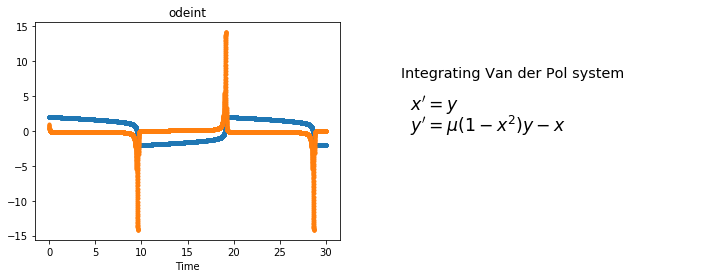

In [2]:
import numpy as np
import matplotlib
from scipy.integrate import odeint

r = 10
def f(y,t):
    return [y[1], r*(1 - y[0]*y[0])*y[1] - y[0]]

# initial value
y0 = [2.0, 1.]

n = 10000
T = 3.0*r
h = T/n
# print h
ts = np.arange(0.0001,T, h)
ys = odeint(f, y0, ts)
   
fig = figure(figsize=[12, 4])
subplot(1, 2, 1)
plot(ts, ys[:, :], '.-')  
xlabel('Time')
title('odeint')

ax = fig.add_subplot(122)
ax.set_axis_off()
ax.text(0, .5, "$\;\; y' = \mu (1-x^2)y - x$ ", size="xx-large");
ax.text(0, .6, "$\;\; x' = y$", size="xx-large");
ax.text(0, .75, "Integrating Van der Pol system", size="x-large");

show()




* Integrating lorenz system using ode(*) in scipy:







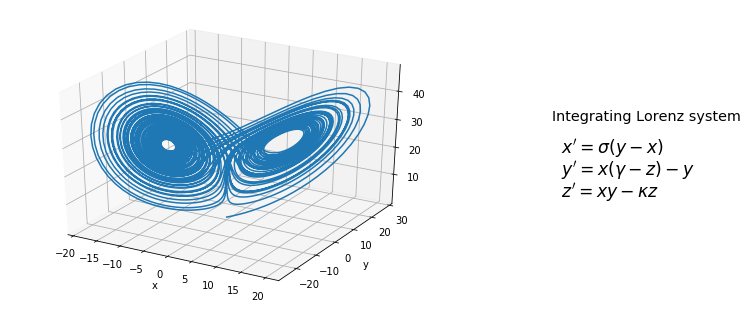

In [3]:
from scipy.integrate import ode
from mpl_toolkits.mplot3d import Axes3D

def lorenz_sys(t, q):
    x = q[0]
    y = q[1]
    z = q[2]
    # sigma, rho and beta are global.
    f = [sigma * (y - x),
         rho*x - y - x*z,
         x*y - beta*z]
    return f


#ic = [1.0, 2.0, 1.0]
ic = [0.01, 0.01, 0.01]
t0 = 0.0
t1 = 70.0
dt = 0.01

sigma = 10.0
rho = 28.0
beta = 8.0/3.0

#sigma = 28.0
#rho = 46.92
#beta = 4.0

solver = ode(lorenz_sys)

t = []
sol = []
solver.set_initial_value(ic, t0)
#solver.set_integrator('dop853')
solver.set_integrator('dopri5')

while solver.successful() and solver.t < t1:
    solver.integrate(solver.t + dt)
    t.append(solver.t)
    sol.append(solver.y)

t = array(t)
sol = array(sol)

fig = figure()
ax = Axes3D(fig)
ax.plot(sol[:,0], sol[:,1], sol[:,2])
xlabel('x')
ylabel('y')

ax = fig.add_subplot(122)
ax.set_axis_off()
ax.text(2, .3, "$\;\; z' = x y -\kappa z$", size="xx-large");
ax.text(2, .4, "$\;\; y' = x ( \gamma - z ) - y $", size="xx-large");
ax.text(2, .5, "$\;\; x' = \sigma (y - x) $", size="xx-large");
ax.text(2, .65, "Integrating Lorenz system", size="x-large");

show()


# Homework 

* Applying the forward Euler's scheme to the second order ODE:

$$
y'' + (\lambda+1)y' + \lambda y = 0, \;\; y(0) = 1, \;\; y'(0) = \lambda - 2, \;\; \lambda >> 1.
$$

Rewrite it as a system of first order ODEs. Find the region of absolute stability. (Hint: find the eigen value decomposition of the coefficient matrix, and the region of absolute stability is the domain where the step size is chosen so that each eigen value satifies the condition for the 1D ODE.)



